<a href="https://colab.research.google.com/github/PSY21801028/SYPark-HGU/blob/main/230321_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_excel('titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [15]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


TypeError: ignored

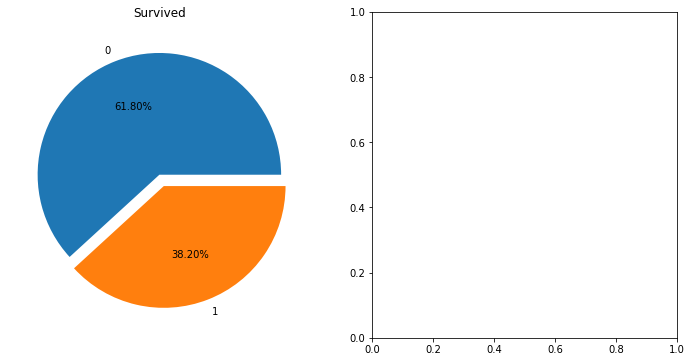

In [16]:
f,ax = plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<Axes: >

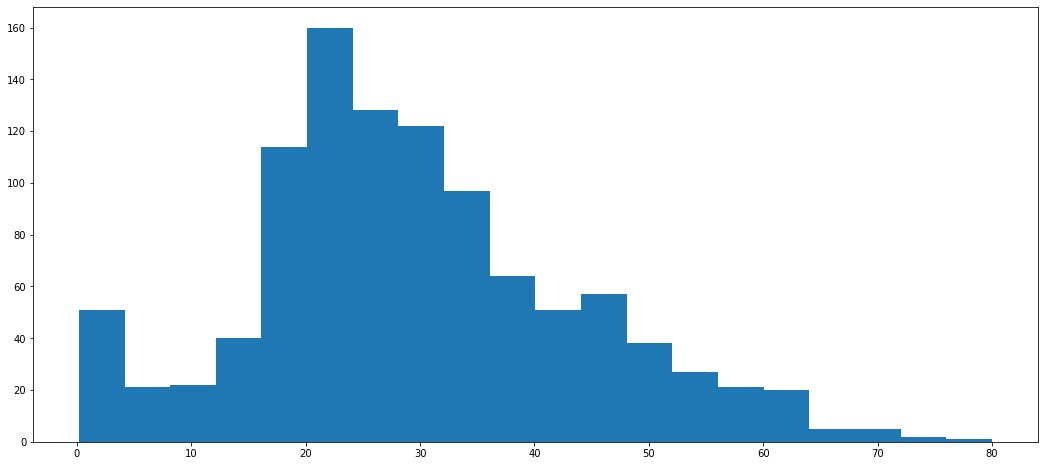

In [17]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False)

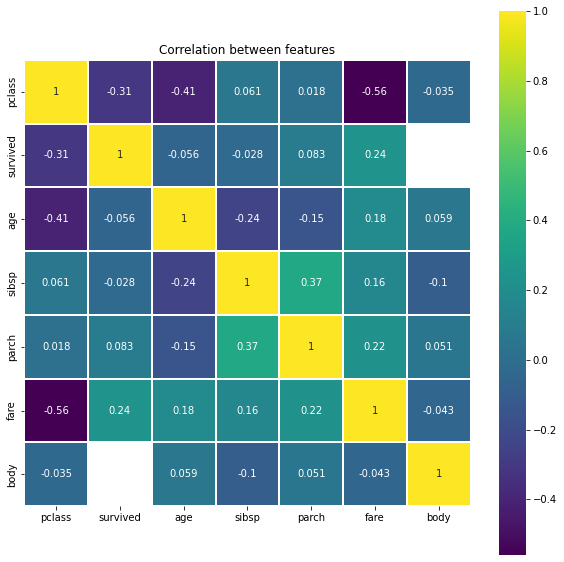

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square =True,
            annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between features')
plt.show()

In [20]:
tmp = []
for each in raw_data['sex']:
  if each == 'female':
    tmp.append(1)
  elif each == 'male':
    tmp.append(0)
  else:
    tmp.append(np.nan)

raw_data['sex'] = tmp

In [21]:
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

In [22]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

In [23]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float64
 1   survived   1045 non-null   float64
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float64
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   float64
 6   parch      1045 non-null   float64
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(8), object(6)
memory usage: 122.5+ KB


In [25]:
x_data = raw_data.values[:,[0,3,4,5,6,8]]
y_data = raw_data.values[:,[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)

In [39]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [34]:
import tensorflow as tf
import keras

In [35]:
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

In [36]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 255)               1785      
                                                                 
 dense_3 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [40]:
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500)

Epoch 1/500
30/30 [==============================] - 5s 9ms/step - loss: 0.2647 - accuracy: 0.6149 - val_loss: 0.2059 - val_accuracy: 0.7048
Epoch 2/500
30/30 [==============================] - 0s 4ms/step - loss: 0.2078 - accuracy: 0.6851 - val_loss: 0.2199 - val_accuracy: 0.7048
Epoch 3/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.7170 - val_loss: 0.1761 - val_accuracy: 0.7619
Epoch 4/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.7383 - val_loss: 0.1719 - val_accuracy: 0.7619
Epoch 5/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.7447 - val_loss: 0.1837 - val_accuracy: 0.7429
Epoch 6/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1758 - accuracy: 0.7532 - val_loss: 0.1642 - val_accuracy: 0.7905
Epoch 7/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1696 - accuracy: 0.7596 - val_loss: 0.1609 - val_accuracy: 0.7810
Epoch 8/500
3

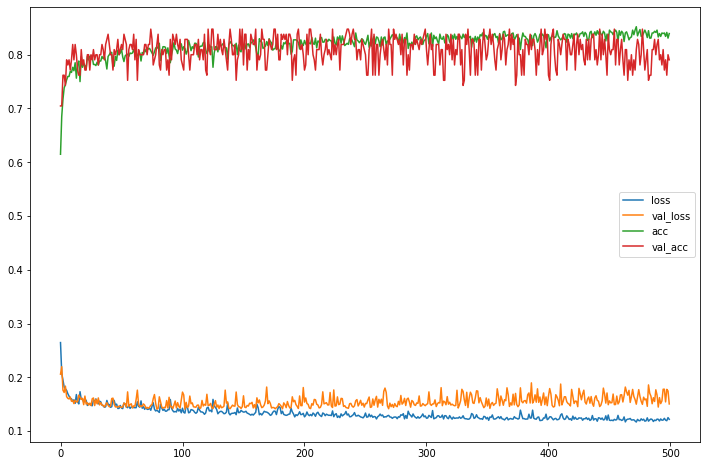

In [41]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.show()

In [42]:
dicaprio = np.array([3.,0.,19.,0.,0.,5.]).reshape(1,6)
winslet = np.array([1.,1.,17.,1.,2.,100.]).reshape(1,6)

In [43]:
model.predict(dicaprio)


1/1 [==============================] - 0s 128ms/step


array([[0.11259001]], dtype=float32)